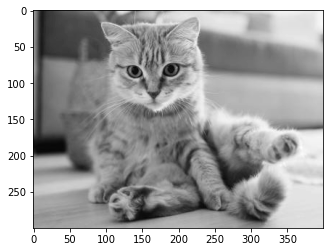

In [3]:
%matplotlib inline
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img1.jpg',0)

#cv2.imshow('Gris',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

plt.imshow(img, cmap='gray')

img (300, 400)
N= 300 M= 400


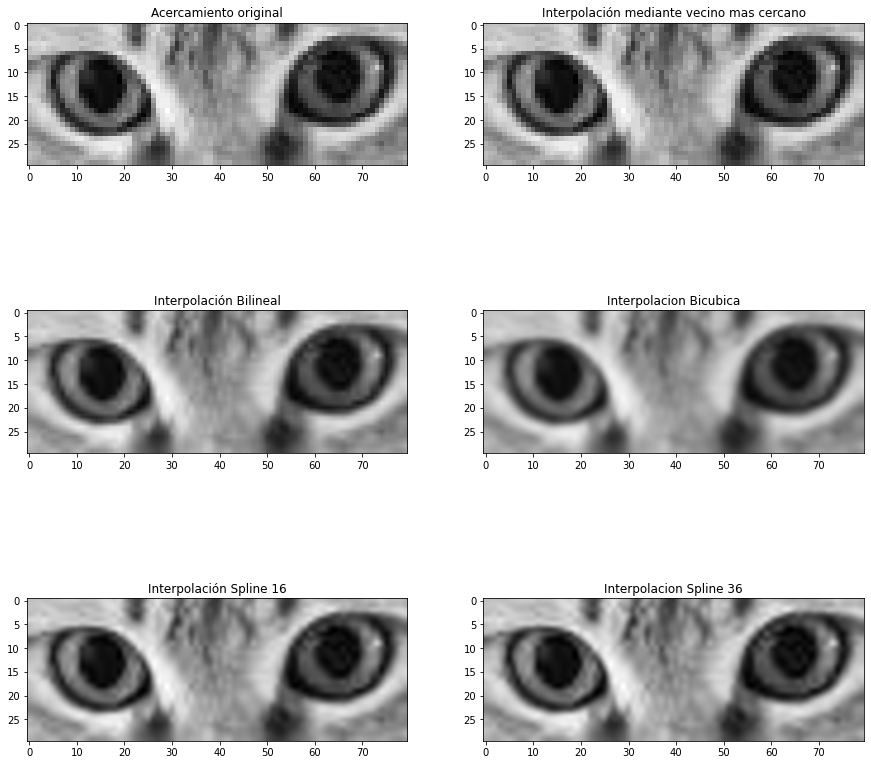

In [4]:
N, M = img.shape[:2]
print('img', img.shape)
print('N=', N, 'M=', M)

plt.figure(1,figsize=[15, 15])
plt.subplot(321), plt.imshow(img[70:100, 125:205], cmap=plt.cm.gray), 
plt.title('Acercamiento original')
plt.subplot(322), plt.imshow(img[70:100, 125:205], cmap=plt.cm.gray, interpolation='nearest')
plt.title('Interpolación mediante vecino mas cercano')
plt.subplot(323), plt.imshow(img[70:100, 125:205], cmap=plt.cm.gray, interpolation='bilinear')
plt.title('Interpolación Bilineal')
plt.subplot(324), plt.imshow(img[70:100, 125:205], cmap=plt.cm.gray, interpolation='bicubic')
plt.title('Interpolacion Bicubica')
plt.subplot(325), plt.imshow(img[70:100, 125:205], cmap=plt.cm.gray, interpolation='spline16')
plt.title('Interpolación Spline 16')
plt.subplot(326), plt.imshow(img[70:100, 125:205], cmap=plt.cm.gray, interpolation='spline36')
plt.title('Interpolacion Spline 36')

plt.show()

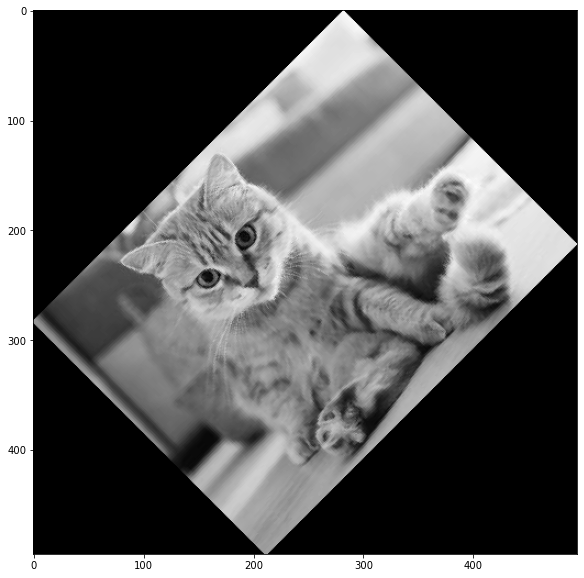

In [32]:
def rotate_coords(x, y, theta):
    s, c = np.sin(theta), np.cos(theta)
    x, y = np.asarray(x), np.asarray(y)
    return x * c - y * s, x * s + y * c

def rotate_image(src, theta, fill=255):

    # Images have origin at the top left, so negate the angle.
    theta = -theta

    # Dimensions of source image. Note that scipy.misc.imread loads
    # images in row-major order, so src.shape gives (height, width).
    sh, sw = src.shape

    # Rotated positions of the corners of the source image.
    cx, cy = rotate_coords([0, sw, sw, 0], [0, 0, sh, sh], theta)

    # Determine dimensions of destination image.
    dw, dh = (int(np.ceil(c.max() - c.min())) for c in (cx, cy))

    # Coordinates of pixels in destination image.
    dx, dy = np.meshgrid(np.arange(dw), np.arange(dh))

    # Corresponding coordinates in source image. Since we are
    # transforming dest-to-src here, the rotation is negated.
    sx, sy = rotate_coords(dx + cx.min(), dy + cy.min(), -theta)

    # Select nearest neighbour.
    sx=sx.astype(int)
    sy=sy.astype(int)
    #sx, sy = sx.round().astype(int), sy.round().astype(int)

    # Mask for valid coordinates.
    mask = (0 <= sx) & (sx < sw) & (0 <= sy) & (sy < sh)

    # Create destination image.
    dest = np.empty(shape=(dh, dw), dtype=src.dtype)

    # Copy valid coordinates from source image.
    dest[dy[mask], dx[mask]] = src[sy[mask], sx[mask]]

    # Fill invalid coordinates.
    dest[dy[~mask], dx[~mask]] = ~fill

    return dest

angle=45

rotated_image=rotate_image(img, angle * np.pi / 180)
plt.figure(1,figsize=[10, 10])
plt.imshow(rotated_image, cmap=plt.cm.gray)

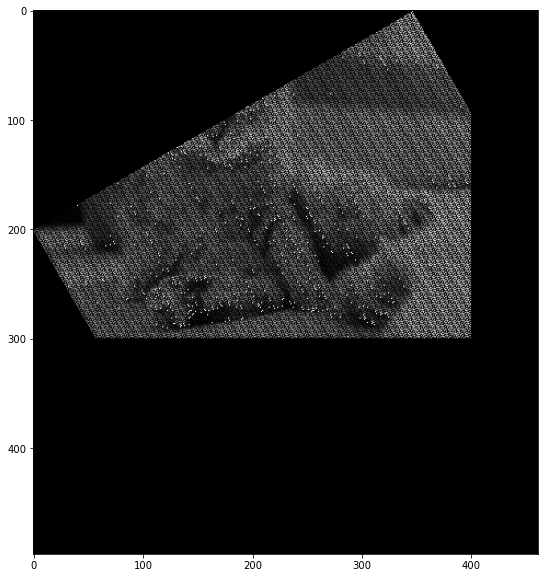

In [31]:
import numpy as np
from PIL import Image
import math
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('img1.jpg',0)
image=img
angle=60                # Ask the user to enter the angle of rotation

# Define the most occuring variables
angle=math.radians(angle)                               #converting degrees to radians
cosine=math.cos(angle)
sine=math.sin(angle)
height=image.shape[0]                                   #define the height of the image
width=image.shape[1]                                    #define the width of the image

# Define the height and width of the new image that is to be formed
new_height  = round(abs(image.shape[0]*cosine)+abs(image.shape[1]*sine))+1
new_width  = round(abs(image.shape[1]*cosine)+abs(image.shape[0]*sine))+1

# define another image variable of dimensions of new_height and new _column filled with zeros
output=np.zeros((new_height,new_width))

# Find the centre of the image about which we have to rotate the image
original_centre_height   = round(((image.shape[0]+1)/2)-1)    #with respect to the original image
original_centre_width    = round(((image.shape[1]+1)/2)-1)    #with respect to the original image

# Find the centre of the new image that will be obtained
new_centre_height= round(((new_height+1)/2)-1)        #with respect to the new image
new_centre_width= round(((new_width+1)/2)-1)          #with respect to the new image

for i in range(height):
    for j in range(width):
        #co-ordinates of pixel with respect to the centre of original image
        y=image.shape[0]-1-i-original_centre_height                   
        x=image.shape[1]-1-j-original_centre_width                      

        #co-ordinate of pixel with respect to the rotated image
        new_y=-x*sine+y*cosine
        new_x=x*cosine+y*sine

        '''since image will be rotated the centre will change too, 
           so to adust to that we will need to change new_x and new_y with respect to the new centre'''
        new_y=new_centre_height-new_y
        new_x=new_centre_width-new_x

        # adding if check to prevent any errors in the processing
        if 0 <= new_x < new_width and 0 <= new_y < new_height and new_x>=0 and new_y>=0:
            x1 = int(new_x)
            y1 = int(new_y)
 
            x2 = x1 + 1
            y2 = y1 + 1
            if x1 < height and x2 < height and y1 < width and y2 < width:
                value=(image[x1,y1]*(x1-new_x)*(y2-new_y)+image[x2,y1]*(new_x-x1)*(y2-new_y)+image[x1,y2]*(x2-new_x)*(new_y-y1)+image[x2,y2]*(new_x-x1)*(new_y-y1))
                output[round(new_x),round(new_y)]=value                          #writing the pixels to the new destination in the output image

rotated_image=Image.fromarray((output).astype(np.uint8))                       # converting array to image
plt.figure(1,figsize=[10, 10])
plt.imshow(rotated_image, cmap=plt.cm.gray)

400
